In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import periodogram
import numpy as np
ticker = "AAPL"
# Establecer estilo de Seaborn
sns.set_style("darkgrid")

df = pd.read_csv(f"../Data/Global_Data_{ticker}.csv")


In [2]:
df.describe()


,Open,High,Low,Close,Volume,SMA_50,SMA_200,RSI,MACD,MACD_signal,avg_sentiment,weighted_sentiment,tweet_count,sentiment_sma_7,sentiment_sma_14
count,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,581.000000,581.000000,581.000000,581.000000,581.000000
mean,-9.783721e-17,-6.848605e-16,1.565395e-15,1.956744e-16,2.140189e-17,-2.005663e-15,1.858907e-15,1.222965e-17,-3.057413e-18,-1.834448e-17,-0.022427,-0.026718,0.150608,0.002610,0.021695
std,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,0.962754,0.966098,1.207091,0.958910,0.952702
min,-2.243338e+00,-2.217936e+00,-2.262981e+00,-2.192218e+00,-1.484881e+00,-2.227854e+00,-2.383641e+00,-2.686845e+00,-3.188405e+00,-2.890389e+00,-1.502437,-1.467483,-0.456950,-2.779955,-2.712647
25%,-6.984179e-01,-6.593957e-01,-7.065993e-01,-7.068768e-01,-6.774832e-01,-6.061971e-01,-5.092120e-01,-7.081002e-01,-4.099109e-01,-3.609993e-01,-0.752563,-0.731005,-0.456950,-0.622082,-0.549679
50%,-2.031364e-01,-1.980500e-01,-1.888428e-01,-1.980752e-01,-2.670456e-01,-1.706724e-01,3.449049e-01,1.686379e-01,1.515667e-01,1.200227e-01,-0.002689,0.016629,-0.190542,0.005571,0.053973
75%,6.034807e-01,5.955760e-01,5.787383e-01,5.956442e-01,3.757015e-01,6.330202e-01,7.592075e-01,7.127241e-01,5.988461e-01,5.756406e-01,0.747185,0.686379,0.342275,0.583979,0.592933
max,3.018572e+00,2.971436e+00,2.983617e+00,2.966396e+00,5.953917e+00,2.667797e+00,1.722870e+00,2.311538e+00,1.854358e+00,1.883373e+00,1.497059,1.500741,17.925236,2.452514,2.526845


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Filtrar el DataFrame asegurando que no haya columnas faltantes
df.dropna(inplace=True)


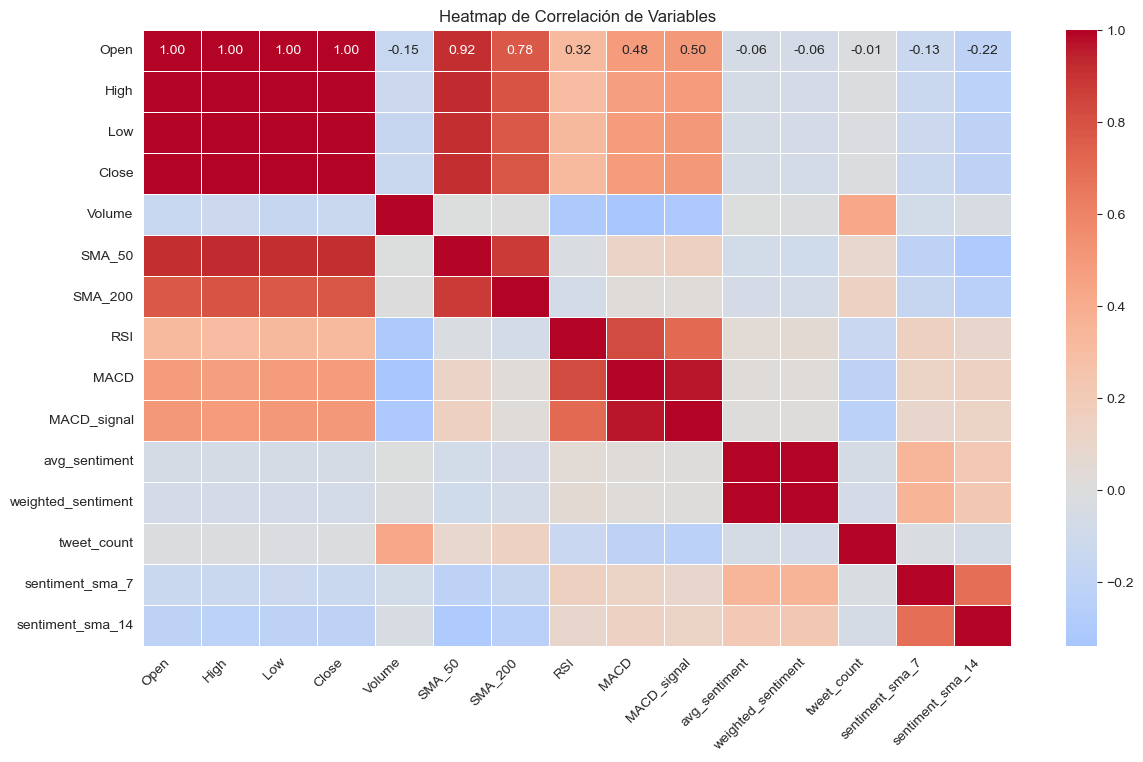

In [8]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar la figura y el tamaño
plt.figure(figsize=(14, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0, linewidths=0.5)

# Rotar etiquetas de los ejes para mejor legibilidad
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Agregar título
plt.title("Heatmap de Correlación de Variables")

# Mostrar el gráfico
plt.show()


c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

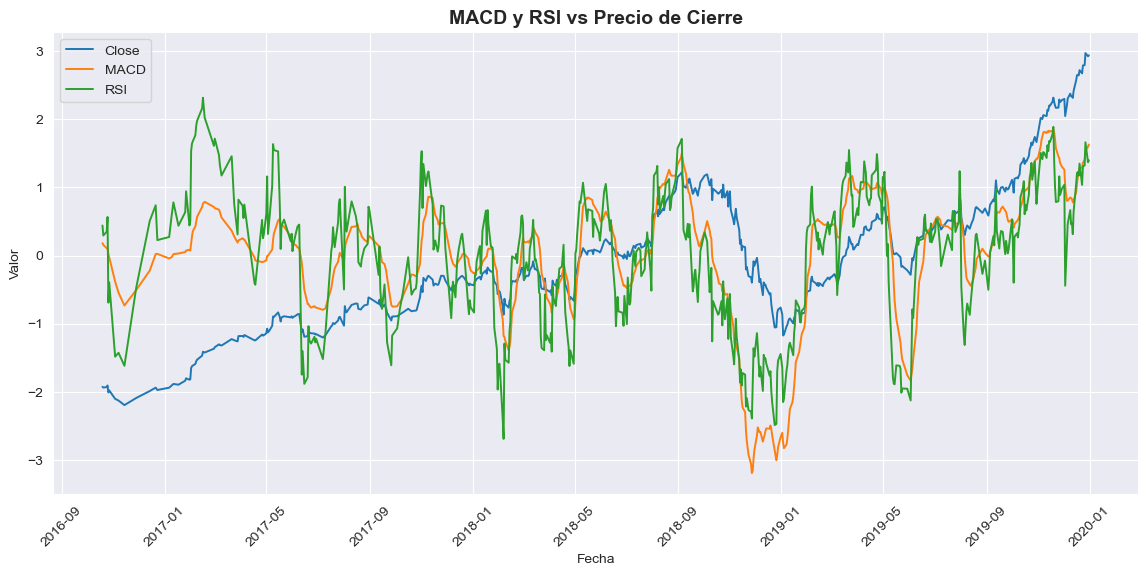

In [35]:
# Crear figura
plt.figure(figsize=(14, 6))

# Graficar las líneas
sns.lineplot(data=df, x=df.index, y="Close", label="Close",linewidth=1.4)
sns.lineplot(data=df, x=df.index, y="MACD", label="MACD", linewidth=1.4)
sns.lineplot(data=df, x=df.index, y="RSI", label="RSI", linewidth=1.4)

# Mejorar ejes y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("MACD y RSI vs Precio de Cierre", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()


c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

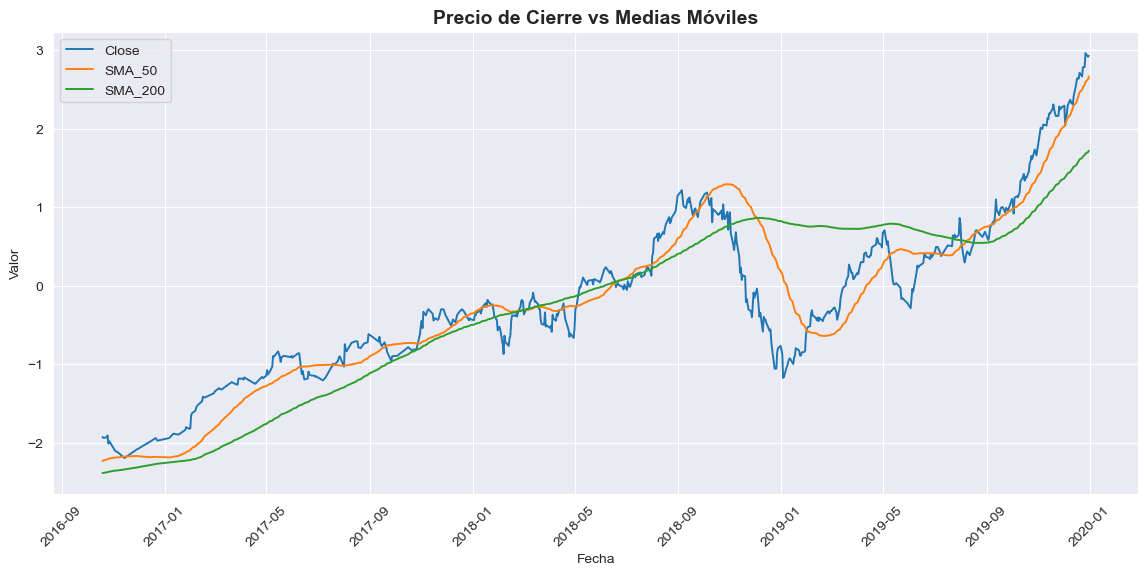

In [36]:
# Crear figura
plt.figure(figsize=(14, 6))

# Graficar las líneas
sns.lineplot(data=df, x=df.index, y="Close", label="Close",linewidth=1.4)
sns.lineplot(data=df, x=df.index, y="SMA_50", label="SMA_50", linewidth=1.4)
sns.lineplot(data=df, x=df.index, y="SMA_200", label="SMA_200", linewidth=1.4)

# Mejorar ejes y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Precio de Cierre vs Medias Móviles", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

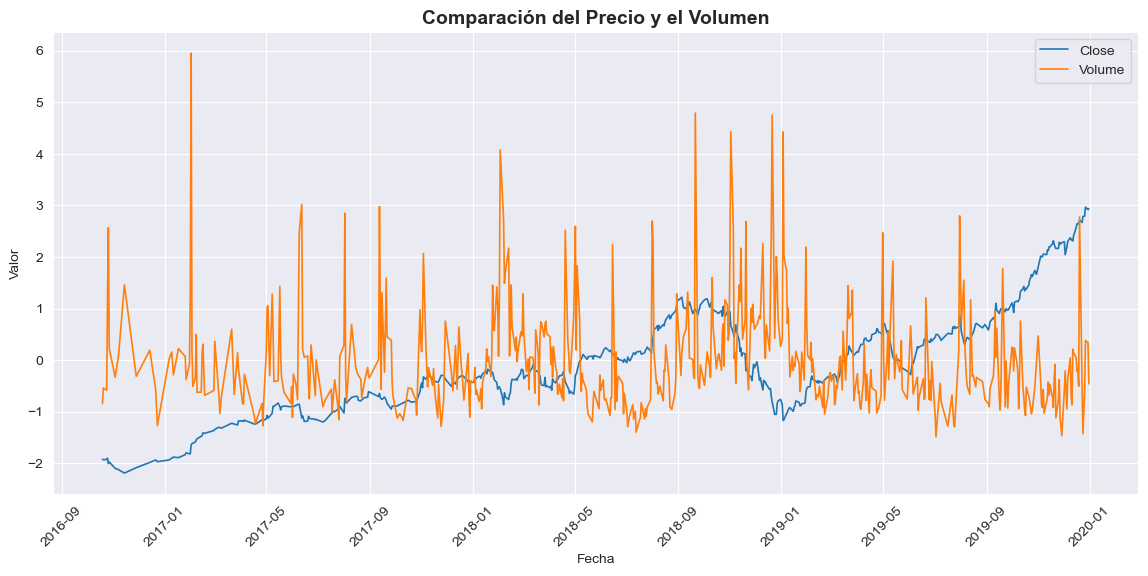

In [37]:
# Crear figura
plt.figure(figsize=(14, 6))

# Graficar las líneas
sns.lineplot(data=df, x=df.index, y="Close", label="Close",linewidth=1.2)
sns.lineplot(data=df, x=df.index, y="Volume", label="Volume", linewidth=1.2)

# Mejorar ejes y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Comparación del Precio y el Volumen", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

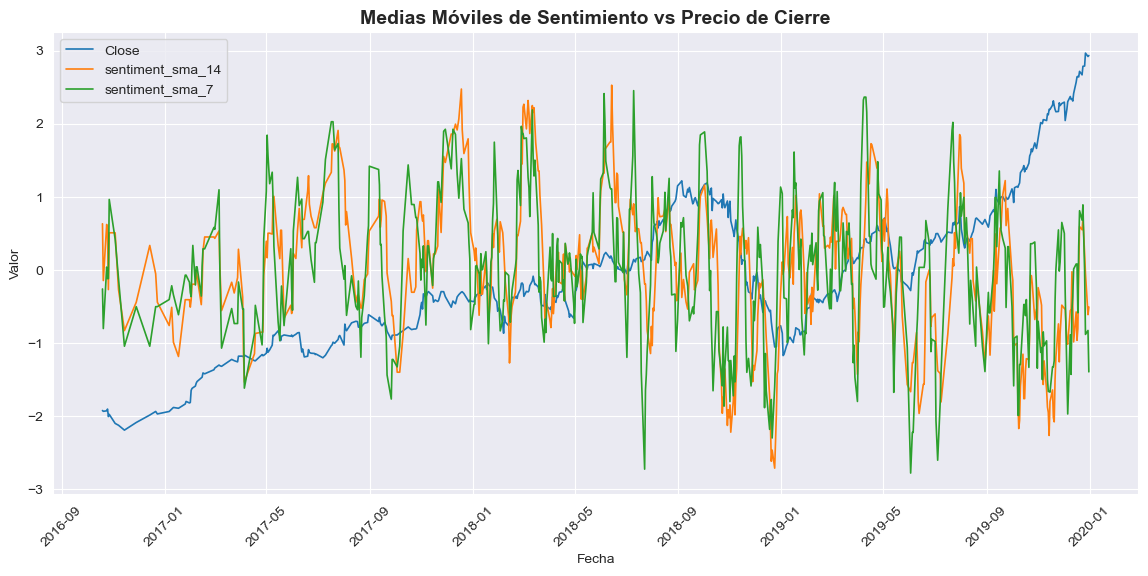

In [38]:
# Crear figura
plt.figure(figsize=(14, 6))

# Graficar las líneas
sns.lineplot(data=df, x=df.index, y="Close", label="Close",linewidth=1.2)
sns.lineplot(data=df, x=df.index, y="sentiment_sma_14", label="sentiment_sma_14", linewidth=1.2)
sns.lineplot(data=df, x=df.index, y="sentiment_sma_7", label="sentiment_sma_7", linewidth=1.2)

# Mejorar ejes y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Medias Móviles de Sentimiento vs Precio de Cierre", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pmyoe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

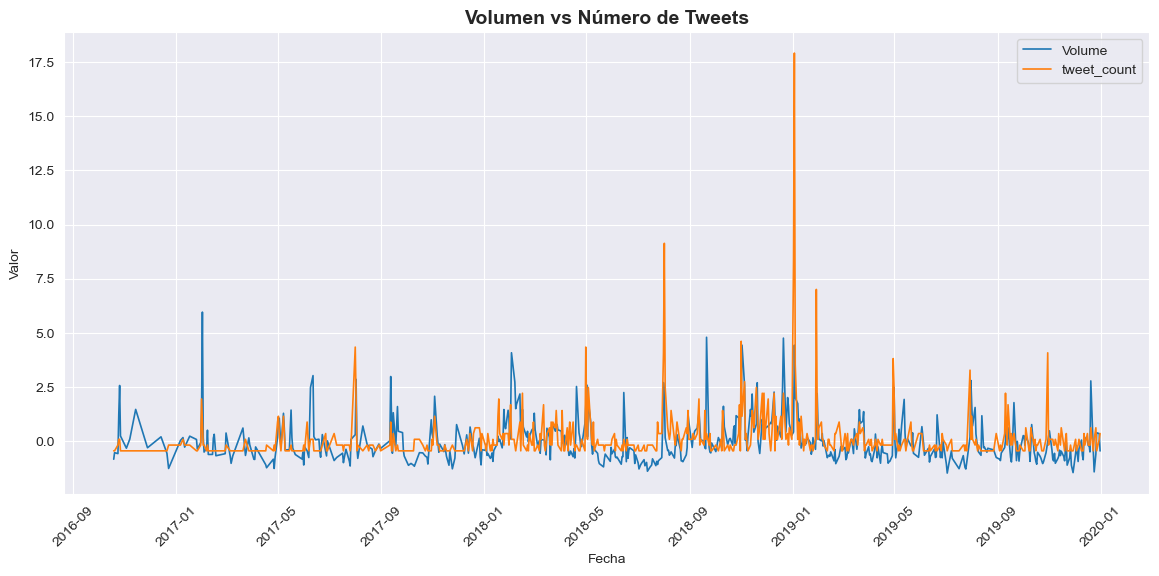

In [39]:
# Crear figura
plt.figure(figsize=(14, 6))

# Graficar las líneas
sns.lineplot(data=df, x=df.index, y="Volume", label="Volume",linewidth=1.2)
sns.lineplot(data=df, x=df.index, y="tweet_count", label="tweet_count", linewidth=1.2)

# Mejorar ejes y título
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Volumen vs Número de Tweets", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

# Mostrar gráfico
plt.show()